In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
#Raw content URL for the dataset
url = "https://raw.githubusercontent.com/hastighsh/Ellehacks_2024/main/datasets/FinalDataSet2.csv"

#Specify the delimiter
delimiter = ','

#Read the data into a DataFrame
daily_weather_df = pd.read_csv(url, delimiter=delimiter)

#Let's create a backup copy of the dataset
daily_weather_df_backup = daily_weather_df.copy()

In [3]:
daily_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,target
0,2008-07-10,25,16,0.0,8.0,4,47,01:52 PM,12:33 AM,06:22 AM,...,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
1,2008-07-10,25,16,0.0,8.0,4,47,01:52 PM,12:33 AM,06:22 AM,...,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
2,2014-06-30,30,22,0.0,10.0,6,16,08:49 AM,10:31 PM,05:34 AM,...,63,92,28.8,1006,30,7,198,16,Illinois,1
3,2014-07-01,26,18,0.0,15.0,6,23,09:46 AM,11:01 PM,05:34 AM,...,19,82,0.0,1007,26,10,265,17,Illinois,1
4,2014-07-02,18,14,0.0,5.0,4,30,10:42 AM,11:30 PM,05:35 AM,...,81,90,1.1,1015,18,7,297,13,Illinois,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2010-06-22,31,19,0.0,14.0,5,73,05:12 PM,02:09 AM,05:26 AM,...,31,76,6.2,1018,31,10,115,8,Newark,0
1049,2010-04-07,25,15,0.0,13.0,5,32,03:23 AM,01:21 PM,06:49 AM,...,9,63,0.0,1006,25,10,233,18,Northern Illinois,0
1050,2010-11-12,18,8,0.0,8.0,3,38,12:17 PM,10:54 PM,06:48 AM,...,49,73,2.3,1024,18,9,104,12,Illinois,0
1051,2010-09-14,33,16,0.0,12.0,7,38,01:58 PM,11:47 PM,07:00 AM,...,6,45,0.0,1016,33,10,281,10,Southern California,0


In [5]:
import pandas as pd

# Read the data into a pandas DataFrame
data = daily_weather_df  # Replace 'your_data.csv' with your actual file path

# Convert 'date_time' column to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract month from 'date_time' column
data['month'] = data['date_time'].dt.month

# Group data by month and count occurrences of power outages
power_outages_by_month = data[data['target'] == 1].groupby('month').size()

# Find the month with the maximum count of power outages
most_power_outage_month = power_outages_by_month.idxmax()

# Print the result
print("Month with the most power outages:", most_power_outage_month)


Month with the most power outages: 12


In [6]:
power_outages_by_month

month
1     37
2     52
3     18
4     19
5      5
6     26
7     51
8     36
9     13
10    22
11    32
12    71
dtype: int64

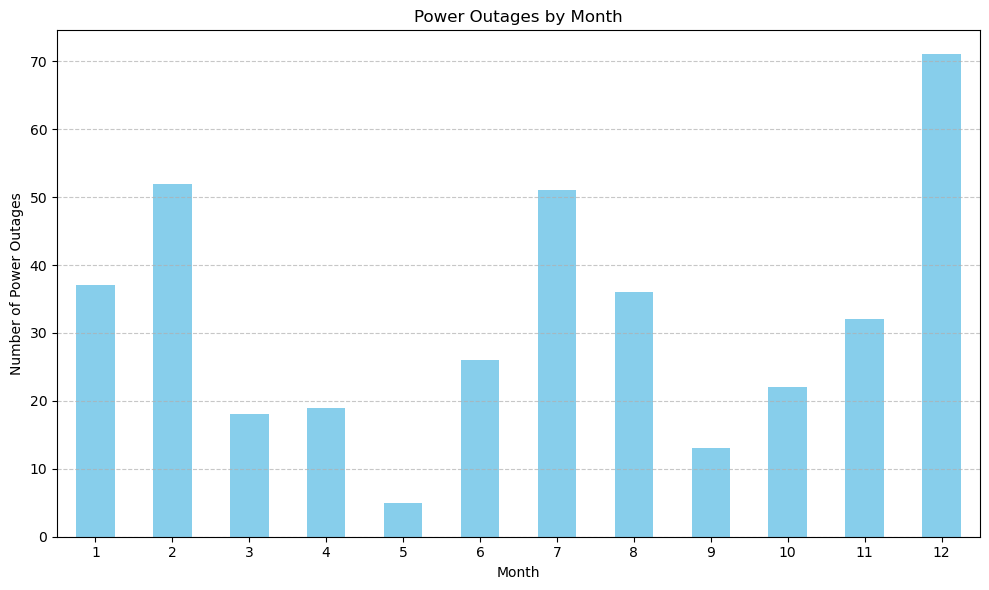

In [7]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
power_outages_by_month.plot(kind='bar', color='skyblue')
plt.title('Power Outages by Month')
plt.xlabel('Month')
plt.ylabel('Number of Power Outages')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()